In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import time

In [82]:
# get the data in data frame
df = pd.read_csv("housing_price_index_2010-11_100.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Particulars,06-2011,09-2011,12-2011,03-2012,06-2012,09-2012,12-2012,03-2013,06-2013,09-2013
1,All India,116.00,119.40,125.50,134.10,142.60,147.10,157.00,160.80,162.30,169.20
2,Ahmedabad,121.30,130.40,137.10,141.00,140.80,146.40,150.60,155.00,161.90,171.70
3,Bangalore,110.70,107.80,138.60,133.30,133.30,136.60,141.20,141.90,142.30,150.40
4,Chennai,101.20,110.40,110.70,108.20,119.20,117.80,137.60,137.40,138.30,150.00


In [83]:
# get the dates for new csv
df_dates = df.iloc[0][1:].values 
df_dates

array([' 06-2011', ' 09-2011', ' 12-2011', ' 03-2012', ' 06-2012',
       ' 09-2012', ' 12-2012', ' 03-2013', ' 06-2013', ' 09-2013'], dtype=object)

In [84]:
# get the city name and its data in different vars and combine to form a new csv
# store the city name for creating plots

In [85]:
df_city_with_date = pd.DataFrame()

df_city_with_date['Date']=df.iloc[0][1:].values

iterate_cities = []
loop_index = df[0][1:].count()
for x in range(1,loop_index):
    df_city_name = df.iloc[x][0:1][0]
    df_city_with_date[df_city_name]=df.iloc[x][1:].values
    iterate_cities.append(df_city_name)



In [86]:
df_city_with_date.head()

,Date,All India,Ahmedabad,Bangalore,Chennai,Delhi,Kolkata
0,06-2011,116.00,121.30,110.70,101.20,126.80,103.00
1,09-2011,119.40,130.40,107.80,110.40,124.80,105.00
2,12-2011,125.50,137.10,138.60,110.70,136.70,103.20
3,03-2012,134.10,141.00,133.30,108.20,158.20,106.10
4,06-2012,142.60,140.80,133.30,119.20,177.30,135.20


In [87]:
# save the csv
df_city_with_date.to_csv("new_hsi_index_india_2010_11_100.csv",index=False, sep="\t")

In [88]:
# read the new csv
formatted_df = pd.read_csv("new_hsi_index_india_2010_11_100.csv", sep="\t")
formatted_df.head()

,Date,All India,Ahmedabad,Bangalore,Chennai,Delhi,Kolkata
0,06-2011,116.0,121.3,110.7,101.2,126.8,103.0
1,09-2011,119.4,130.4,107.8,110.4,124.8,105.0
2,12-2011,125.5,137.1,138.6,110.7,136.7,103.2
3,03-2012,134.1,141.0,133.3,108.2,158.2,106.1
4,06-2012,142.6,140.8,133.3,119.2,177.3,135.2


In [77]:
#define a function to convert str to unix timestamp

In [78]:
def str_to_time(s):
    ''' convert str time to unix timestamp '''
    s = s.strip()
    dateconv = np.vectorize(dt.datetime.fromtimestamp)
    date = dateconv(time.mktime(dt.datetime.strptime(s, "%m-%Y").timetuple()))
    return date

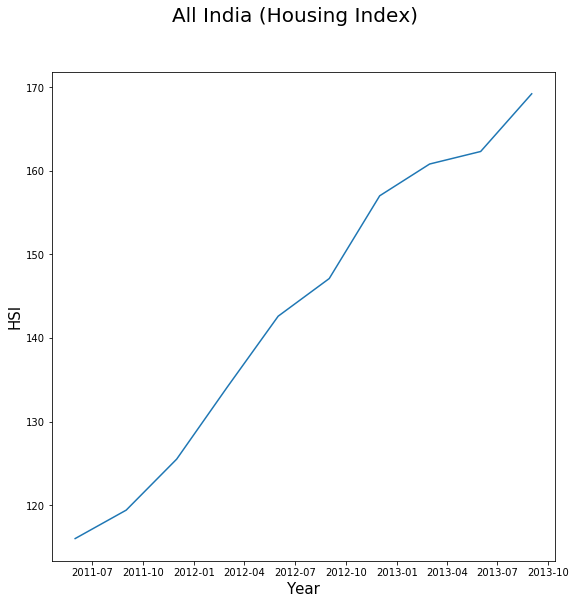

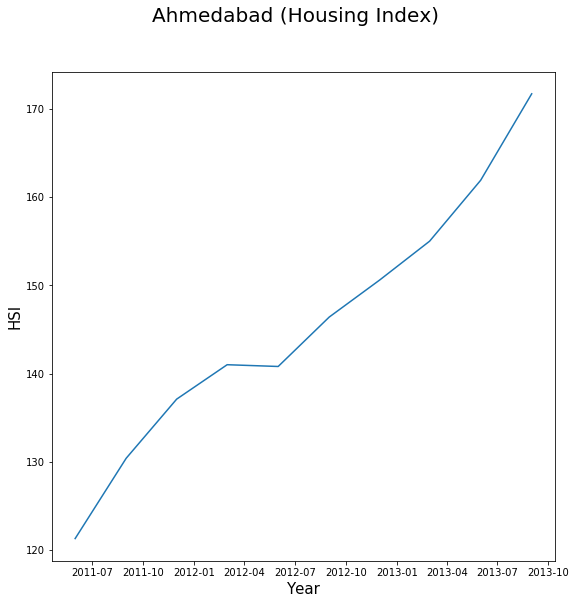

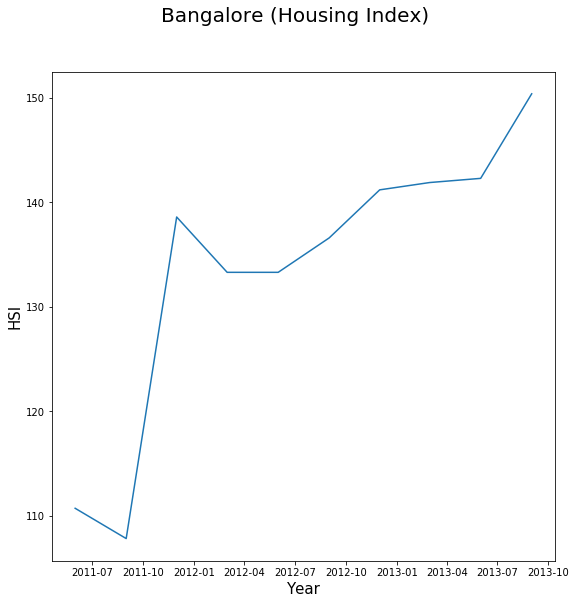

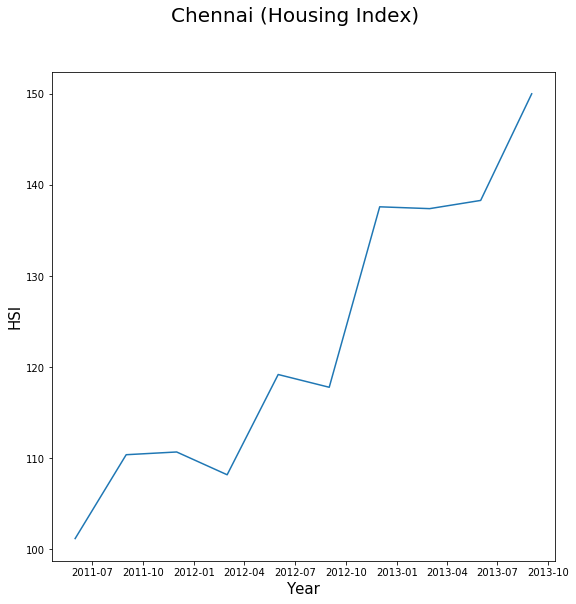

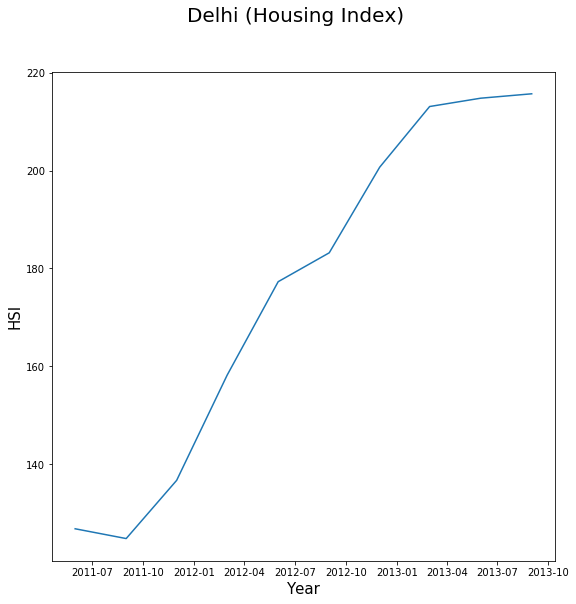

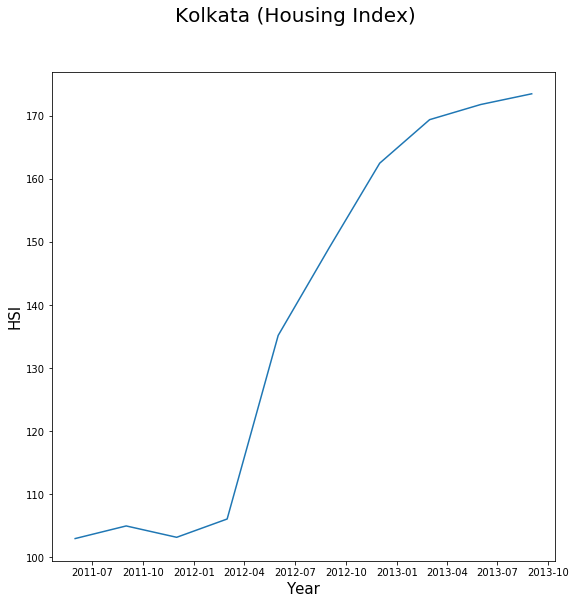

In [97]:
# convert the date
X = formatted_df["Date"]
df_datetime_int = X.map(str_to_time)

# plot the graph
for city in iterate_cities:
    ''' plot the graph '''
    
    y = formatted_df[city]
    fig = plt.figure(figsize=(9,9))
    plt.plot_date(df_datetime_int,y,'-')
    fig.suptitle(city +" (Housing Index)", fontsize=20)
    plt.xlabel("Year", fontsize=15)
    plt.ylabel("HSI", fontsize=15)
    plt.show()